In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from neural_astar.planner import NeuralAstar
from neural_astar.utils.data_sdd import create_sdd_dataloader
from neural_astar.utils.training import load_from_ptl_checkpoint

/home/sam/Desktop/Tesi/neural-astar/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


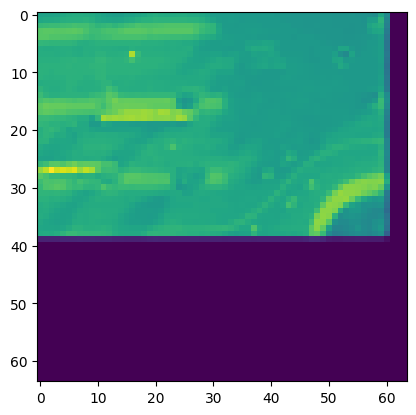

In [10]:
dataloader = create_sdd_dataloader("/home/sam/Desktop/Tesi/neural-astar/planning-datasets/data/sdd/s064_0.5_128_300/bookstore/", "video1", 1)
map_designs, start_maps, goal_maps, opt_trajs = next(iter(dataloader))

plt.imshow(map_designs[0][0].permute(1, 0))

In [11]:

model = NeuralAstar(encoder_input="rgb+", encoder_arch="Unet", encoder_depth=3, learn_obstacles=True, Tmax=1.0, const=10.)
model.load_state_dict(load_from_ptl_checkpoint("../model/lightning_logs/version_4"))

load ../model/lightning_logs/version_4/checkpoints/epoch=0-step=24.ckpt


<All keys matched successfully>

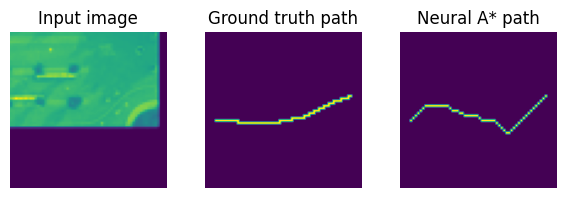

In [12]:
outputs = model(map_designs, start_maps, goal_maps)

t = 0
fig, axes = plt.subplots(1, 3, figsize=[6, 2])
axes[0].imshow(map_designs[t][2].permute(1, 0))
axes[0].axis("off")
axes[1].imshow(opt_trajs[t, 0])
axes[0].set_title("Input image")
axes[1].axis("off")
axes[1].set_title("Ground truth path")
axes[2].imshow(outputs.paths[t, 0])
axes[2].axis("off")
axes[2].set_title("Neural A* path")
fig.tight_layout()
plt.savefig("../assets/sdd.png")